<a href="https://colab.research.google.com/github/lcphy/Digital-Innovation-Lab/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#CLUSTERING

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import datetime
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [0]:
input_file = 'https://raw.githubusercontent.com/lcphy/Digital-Innovation-Lab/master/total_reviews.csv'
df = pd.read_csv(input_file, sep=';', header = 0) 

In [175]:
df.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [0]:
df = df[['User Id', 'Religious', 'Theatre','Shopping','Sports', 'Picnic', 'Nature']]

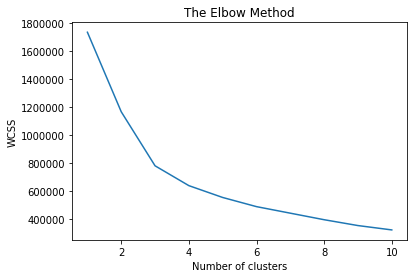

None

In [177]:
# Importing the dataset
X_s = df.iloc[:, [1,2,3,4,5,6]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_s)
    wcss.append(kmeans.inertia_)

plt.clf()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
display(plt.show())

In [0]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_s)

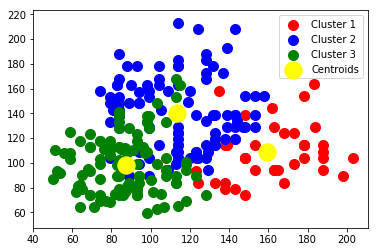

None

In [179]:
# Visualising the clusters
plt.clf()
plt.scatter(X_s[y_kmeans == 0, 0], X_s[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_s[y_kmeans == 1, 0], X_s[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_s[y_kmeans == 2, 0], X_s[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
display(plt.show())

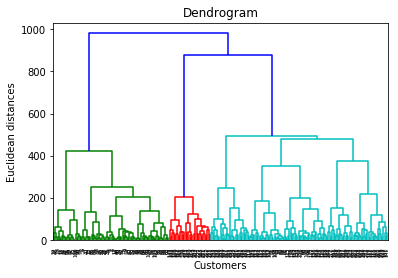

None

In [180]:
X = df.iloc[:, [1,2,3,4,5,6]].values

# Using the dendrogram to find the optimal number of clusters
plt.clf()
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
display(plt.show())

In [0]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

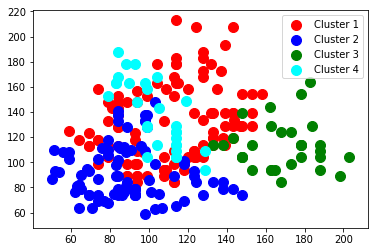

None

In [182]:
# Visualising the clusters
plt.clf()
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.legend()
display(plt.show())

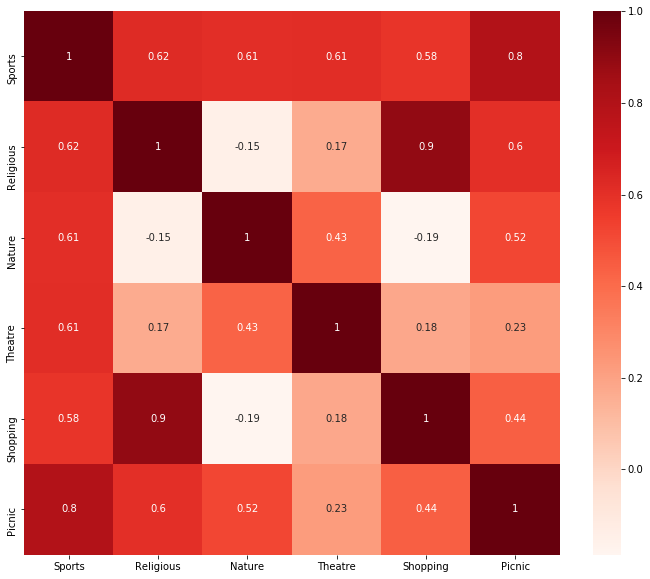

In [183]:
#Using Pearson Correlation

import seaborn as sns

input_file = "/content/gdrive/My Drive/Colab Notebooks/total_reviews.csv"
df = pd.read_csv(input_file, sep=';', header = 0) 

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [184]:
#Correlation with output variable
#Selecting highly correlated features
relevant_features = cor[cor>0.7]
relevant_features

,Sports,Religious,Nature,Theatre,Shopping,Picnic
Sports,1.000000,NaN,NaN,NaN,NaN,0.797777
Religious,NaN,1.000000,NaN,NaN,0.895652,NaN
Nature,NaN,NaN,1.0,NaN,NaN,NaN
Theatre,NaN,NaN,NaN,1.0,NaN,NaN
Shopping,NaN,0.895652,NaN,NaN,1.000000,NaN
Picnic,0.797777,NaN,NaN,NaN,NaN,1.000000
